In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 2.5+ MB


In [7]:
data.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,2892.000000,1.418000e+03,1496.000000,1502.000000,1501.000000,1504.000000,1506.000000,1505.000000,1505.000000,1504.000000,1506.000000,1506.000000,1.409000e+03,1484.000000
mean,1446.500000,8.260054e+07,13.340909,17.032956,7.389407,8.688248,22.862052,20.411047,18.556146,14.504654,9.073705,7.695883,1.022001e+05,6.983154
std,834.992814,2.669125e+09,9.774109,23.732669,18.126732,20.058918,24.790376,24.551695,24.353933,22.781907,20.800537,18.112911,1.048656e+05,2.156797
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000
25%,723.750000,6.500000e+04,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+04,6.000000
50%,1446.500000,1.200000e+05,11.000000,10.000000,0.000000,0.000000,20.000000,10.000000,10.000000,5.000000,0.000000,0.000000,8.280200e+04,7.000000
75%,2169.250000,2.097500e+05,19.250000,20.000000,5.000000,10.000000,30.000000,25.000000,25.000000,20.000000,10.000000,8.000000,1.350000e+05,8.000000
max,2892.000000,1.000000e+11,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000e+06,10.000000


In [9]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f'missing values in each column\n', missing_values)

missing values in each column
 RemoteWork              478
CodingActivities        479
LearnCode                 8
LearnCodeOnline         487
TechDoc                 826
                       ... 
JobSatPoints_11        1386
SurveyLength             44
SurveyEase               39
ConvertedCompYearly    1483
JobSat                 1408
Length: 108, dtype: int64


In [11]:
data.isna().sum()

ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork              478
                       ... 
JobSatPoints_11        1386
SurveyLength             44
SurveyEase               39
ConvertedCompYearly    1483
JobSat                 1408
Length: 114, dtype: int64

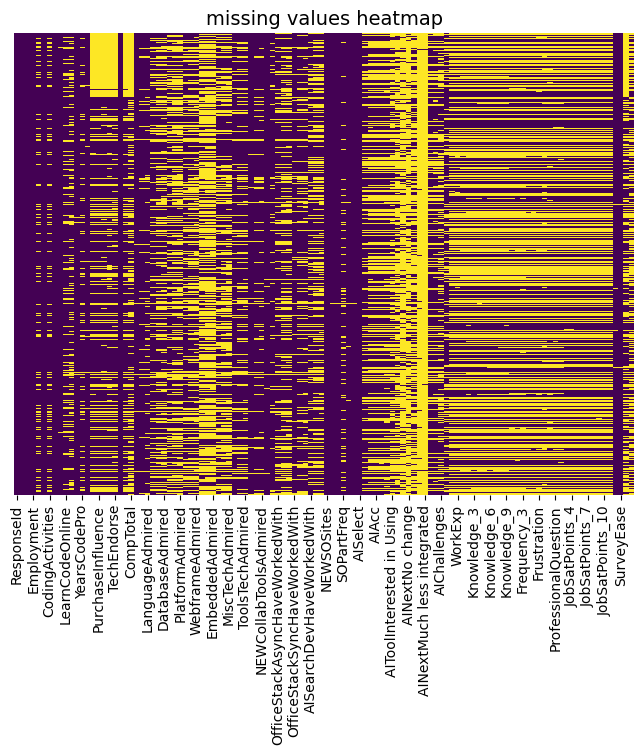

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('missing values heatmap', fontsize=14)
plt.show()

In [17]:
missing_employment = data['Employment'].isnull().sum()
print("Number of missing rows in 'Employment':", missing_employment)

Number of missing rows in 'Employment': 0


In [25]:
most_frequent_value = data['Employment'].mode()[0]
print('most frequent value in employment:', most_frequent_value)

most frequent value in employment: Employed, full-time


In [27]:
data['Employment'].fillna(most_frequent_value, inplace=True)
print('after imputing missing values:', data['Employment'].isnull().sum())

after imputing missing values: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_28240\3713196159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Employment'].fillna(most_frequent_value, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_28240\3633560627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Employment'], palette='Set2')


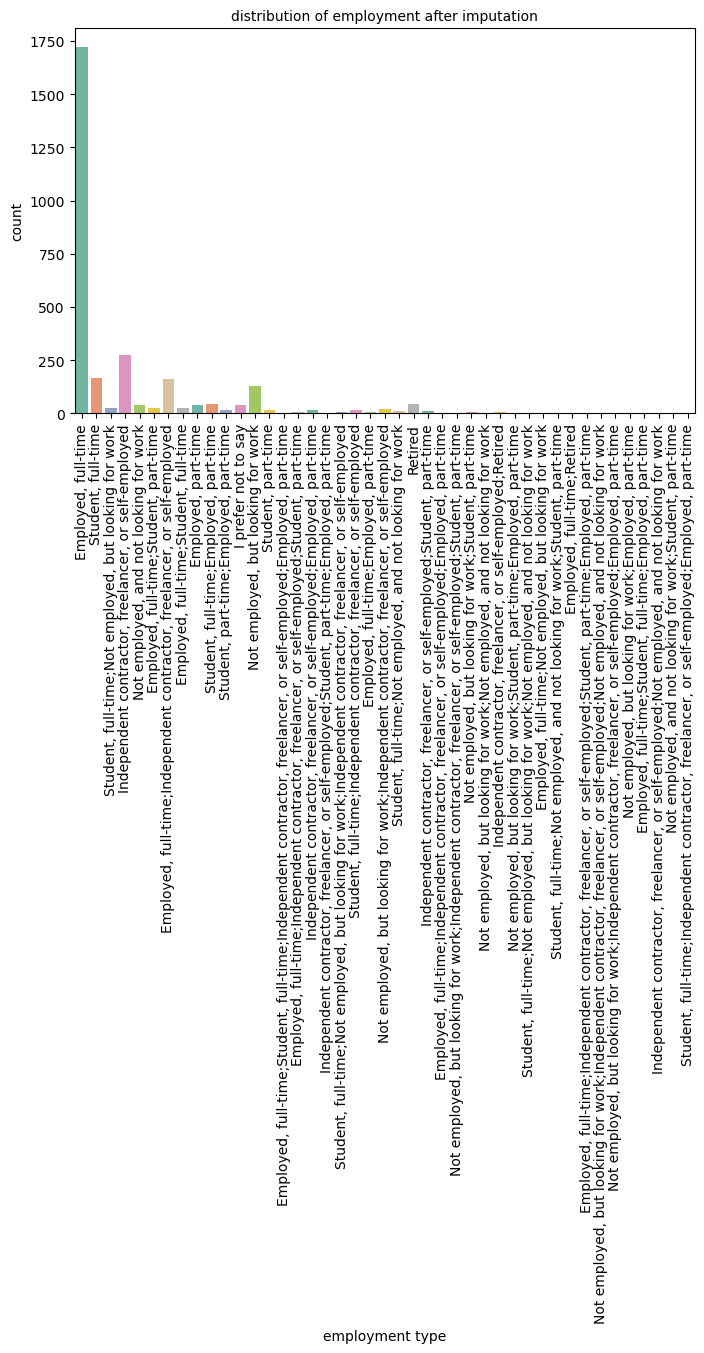

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Employment'], palette='Set2')
plt.xlabel('employment type', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.title('distribution of employment after imputation', fontsize=10)
plt.xticks(rotation=90)
plt.show()